In [ ]:
import pandas as pd
import boto3
import json
import io
from typing import Dict
import matplotlib.pyplot as plt

def load_parquets(bucket: str, prefix: str) -> Dict[str, pd.DataFrame]:
    s3 = boto3.client("s3")
    result = {}

    if not prefix.endswith("/"):
        prefix = prefix + "/"

    paginator = s3.get_paginator("list_objects_v2")
    pages = paginator.paginate(Bucket=bucket, Prefix=prefix)

    keys = []
    for page in pages:
        for obj in page.get("Contents", []):
            key = obj["Key"]
            if key.endswith(".parquet"):
                keys.append(key)

    for key in keys:
        filename = key.split("/")[-1]
        name = filename.rsplit(".", 1)[0]

        buf = io.BytesIO()
        s3.download_fileobj(bucket, key, buf)
        buf.seek(0)

        df = pd.read_parquet(buf)

        if "timestamp_ms" in df.columns:
            df["datetime"] = pd.to_datetime(df["timestamp_ms"], unit="ms")
            df = df.drop(columns=["timestamp_ms"])
            df = df.set_index("datetime")

        result[name] = df

    return result

bucket = 'polymarket-snapshot'
prefix = 'crypto/freq=1H/2025-12-03T12:00:00Z/Up/'
prefix = 'EPL/team=tottenham/'

dataset = load_parquets(bucket, prefix)
dataset.keys()

dict_keys(['book', 'last_trade_price', 'price_change', 'tick_size_change'])

In [61]:
for i in dataset.keys():
    print('data name:', i)
    print('columns:', dataset[i].columns.values)
    print('')

data name: book
columns: ['asset_id' 'market' 'hash' 'bids' 'asks']

data name: last_trade_price
columns: ['asset_id' 'market' 'price' 'size' 'side' 'fee_rate_bps' 'hash']

data name: price_change
columns: ['asset_id' 'market' 'price' 'size' 'side' 'hash' 'best_bid' 'best_ask']

data name: tick_size_change
columns: ['asset_id' 'market' 'old_tick_size' 'new_tick_size' 'hash']



In [97]:
dataset['book'].head()

asset_id  \
datetime                                                                     
2025-12-03 10:00:50.031  4376229108620413111809059264746974645388018709...   
2025-12-03 10:00:55.828  7401718658690281395362420913330632071138525024...   
2025-12-03 10:03:28.441  7401718658690281395362420913330632071138525024...   
2025-12-03 10:16:17.373  7401718658690281395362420913330632071138525024...   
2025-12-03 10:16:24.931  7401718658690281395362420913330632071138525024...   

                                                                    market  \
datetime                                                                     
2025-12-03 10:00:50.031  0x5b51400efbcb985ec74f81340e08ff4997e664d97edf...   
2025-12-03 10:00:55.828  0xd835538bebb0ec3729cd1235daf91f63ec5ead669a31...   
2025-12-03 10:03:28.441  0xd835538bebb0ec3729cd1235daf91f63ec5ead669a31...   
2025-12-03 10:16:17.373  0xd835538bebb0ec3729cd1235daf91f63ec5ead669a31...   
2025-12-03 10:16:24.931  0xd835538bebb0ec3729cd1235daf91f63ec5ead669a31...   

                                                             hash  \
datetime                                                            
2025-12-03 10:00:50.031  ec512fa2abb2ea9adb10930f59e5b090a38a592e   
2025-12-03 10:00:55.828  c81ee658688b98aa04d0496c5910024161922137   
2025-12-03 10:03:28.441  6eb5dc730a2b13dfe4a2fc50b2ca0bf46f3ccedb   
2025-12-03 10:16:17.373  d78dee61f00c3f459a80949d22217ce35fbb7477   
2025-12-03 10:16:24.931  0a31470d05a11b7f057c76f24acb619d9eeabe23   

                                                                      bids  \
datetime                                                                     
2025-12-03 10:00:50.031  [{"price": "0.01", "size": "27386.18"}, {"pric...   
2025-12-03 10:00:55.828  [{"price": "0.01", "size": "39474.18"}, {"pric...   
2025-12-03 10:03:28.441  [{"price": "0.01", "size": "39474.18"}, {"pric...   
2025-12-03 10:16:17.373  [{"price": "0.01", "size": "39514.18"}, {"pric...   
2025-12-03 10:16:24.931  [{"price": "0.01", "size": "39514.18"}, {"pric...   

                                                                      asks  
datetime                                                                    
2025-12-03 10:00:50.031  [{"price": "0.99", "size": "27386.36"}, {"pric...  
2025-12-03 10:00:55.828  [{"price": "0.99", "size": "39474.18"}, {"pric...  
2025-12-03 10:03:28.441  [{"price": "0.99", "size": "39474.18"}, {"pric...  
2025-12-03 10:16:17.373  [{"price": "0.99", "size": "39522.18"}, {"pric...  
2025-12-03 10:16:24.931  [{"price": "0.99", "size": "39522.18"}, {"pric...

In [98]:
dataset['last_trade_price']

asset_id  \
datetime                                                                     
2025-12-03 10:03:28.472  7401718658690281395362420913330632071138525024...   
2025-12-03 10:16:17.401  7401718658690281395362420913330632071138525024...   
2025-12-03 10:16:30.322  7401718658690281395362420913330632071138525024...   
2025-12-03 10:16:47.609  7401718658690281395362420913330632071138525024...   
2025-12-03 10:17:04.925  7401718658690281395362420913330632071138525024...   
...                                                                    ...   
2025-12-03 12:00:41.467  7401718658690281395362420913330632071138525024...   
2025-12-03 12:00:47.375  4376229108620413111809059264746974645388018709...   
2025-12-03 12:00:49.395  7401718658690281395362420913330632071138525024...   
2025-12-03 12:01:00.736  7401718658690281395362420913330632071138525024...   
2025-12-03 12:01:16.591  7401718658690281395362420913330632071138525024...   

                                                                    market  \
datetime                                                                     
2025-12-03 10:03:28.472  0xd835538bebb0ec3729cd1235daf91f63ec5ead669a31...   
2025-12-03 10:16:17.401  0xd835538bebb0ec3729cd1235daf91f63ec5ead669a31...   
2025-12-03 10:16:30.322  0xd835538bebb0ec3729cd1235daf91f63ec5ead669a31...   
2025-12-03 10:16:47.609  0xd835538bebb0ec3729cd1235daf91f63ec5ead669a31...   
2025-12-03 10:17:04.925  0xd835538bebb0ec3729cd1235daf91f63ec5ead669a31...   
...                                                                    ...   
2025-12-03 12:00:41.467  0xd835538bebb0ec3729cd1235daf91f63ec5ead669a31...   
2025-12-03 12:00:47.375  0x5b51400efbcb985ec74f81340e08ff4997e664d97edf...   
2025-12-03 12:00:49.395  0xd835538bebb0ec3729cd1235daf91f63ec5ead669a31...   
2025-12-03 12:01:00.736  0xd835538bebb0ec3729cd1235daf91f63ec5ead669a31...   
2025-12-03 12:01:16.591  0xd835538bebb0ec3729cd1235daf91f63ec5ead669a31...   

                         price      size  side fee_rate_bps  hash  
datetime                                                           
2025-12-03 10:03:28.472   0.49      1.02  SELL            0  None  
2025-12-03 10:16:17.401   0.51  82.35294   BUY            0  None  
2025-12-03 10:16:30.322   0.51  2.156861   BUY            0  None  
2025-12-03 10:16:47.609   0.51  2.156861   BUY            0  None  
2025-12-03 10:17:04.925   0.51  2.156861   BUY            0  None  
...                        ...       ...   ...          ...   ...  
2025-12-03 12:00:41.467   0.99        75  SELL            0  None  
2025-12-03 12:00:47.375  0.999      6.58  SELL            0  None  
2025-12-03 12:00:49.395   0.99      4.83  SELL            0  None  
2025-12-03 12:01:00.736   0.99     27.02  SELL            0  None  
2025-12-03 12:01:16.591   0.99    227.25  SELL            0  None  

[1742 rows x 7 columns]

In [99]:
dataset['price_change']

asset_id  \
datetime                                                                     
2025-12-03 10:01:32.535  7401718658690281395362420913330632071138525024...   
2025-12-03 10:01:32.818  7401718658690281395362420913330632071138525024...   
2025-12-03 10:01:33.149  7401718658690281395362420913330632071138525024...   
2025-12-03 10:01:33.529  7401718658690281395362420913330632071138525024...   
2025-12-03 10:01:33.891  7401718658690281395362420913330632071138525024...   
...                                                                    ...   
2025-12-03 12:01:09.897  7401718658690281395362420913330632071138525024...   
2025-12-03 12:01:16.559  7401718658690281395362420913330632071138525024...   
2025-12-03 12:01:19.596  7401718658690281395362420913330632071138525024...   
2025-12-03 12:01:19.630  7401718658690281395362420913330632071138525024...   
2025-12-03 12:01:23.725  7401718658690281395362420913330632071138525024...   

                                                                    market  \
datetime                                                                     
2025-12-03 10:01:32.535  0xd835538bebb0ec3729cd1235daf91f63ec5ead669a31...   
2025-12-03 10:01:32.818  0xd835538bebb0ec3729cd1235daf91f63ec5ead669a31...   
2025-12-03 10:01:33.149  0xd835538bebb0ec3729cd1235daf91f63ec5ead669a31...   
2025-12-03 10:01:33.529  0xd835538bebb0ec3729cd1235daf91f63ec5ead669a31...   
2025-12-03 10:01:33.891  0xd835538bebb0ec3729cd1235daf91f63ec5ead669a31...   
...                                                                    ...   
2025-12-03 12:01:09.897  0xd835538bebb0ec3729cd1235daf91f63ec5ead669a31...   
2025-12-03 12:01:16.559  0xd835538bebb0ec3729cd1235daf91f63ec5ead669a31...   
2025-12-03 12:01:19.596  0xd835538bebb0ec3729cd1235daf91f63ec5ead669a31...   
2025-12-03 12:01:19.630  0xd835538bebb0ec3729cd1235daf91f63ec5ead669a31...   
2025-12-03 12:01:23.725  0xd835538bebb0ec3729cd1235daf91f63ec5ead669a31...   

                        price       size  side  \
datetime                                         
2025-12-03 10:01:32.535  0.51    1158.75  SELL   
2025-12-03 10:01:32.818  0.51    1030.75  SELL   
2025-12-03 10:01:33.149  0.52       1249  SELL   
2025-12-03 10:01:33.529  0.52       1121  SELL   
2025-12-03 10:01:33.891  0.52        993  SELL   
...                       ...        ...   ...   
2025-12-03 12:01:09.897  0.99  110269.42   BUY   
2025-12-03 12:01:16.559  0.99  110042.17   BUY   
2025-12-03 12:01:19.596  0.99  110062.17   BUY   
2025-12-03 12:01:19.630  0.99  110042.17   BUY   
2025-12-03 12:01:23.725  0.99  110052.26   BUY   

                                                             hash best_bid  \
datetime                                                                     
2025-12-03 10:01:32.535  f6cb439ff29a678b070a3807b94cf07a42afd871     0.49   
2025-12-03 10:01:32.818  7c5c4dc0e4a26ec6013f321f64ee320ac2fa8399     0.49   
2025-12-03 10:01:33.149  891a4160848dc2e6a39d48347dd3028ee15745e4     0.49   
2025-12-03 10:01:33.529  44faf065eebc8fc50f273db079f7d26eb8d0b2e3     0.49   
2025-12-03 10:01:33.891  b469ac8851aeef7c58e333c0effd564635aca7b5     0.49   
...                                                           ...      ...   
2025-12-03 12:01:09.897  96eb78777f85a2b2659fe01bf564e963136c53e5     0.99   
2025-12-03 12:01:16.559  9b855946a0496c820b27ddbb78688cc5ff4ad109     0.99   
2025-12-03 12:01:19.596  f35d32db834917be82ca0b604069f7ccc92d5cc1     0.99   
2025-12-03 12:01:19.630  dfdffaeea2392c2969a45d2b19ac9be074f1418d     0.99   
2025-12-03 12:01:23.725  5eda1d43f3e192d25dfea929e43764b2cdf052d5     0.99   

                        best_ask  
datetime                          
2025-12-03 10:01:32.535     0.51  
2025-12-03 10:01:32.818     0.51  
2025-12-03 10:01:33.149     0.51  
2025-12-03 10:01:33.529     0.51  
2025-12-03 10:01:33.891     0.51  
...                          ...  
2025-12-03 12:01:09.897        1  
2025-12-03 12:01:16.559        1  
2025-12-03 12:01:19.

In [100]:
dataset['tick_size_change']

asset_id  \
datetime                                                                     
2025-12-03 11:47:53.855  4376229108620413111809059264746974645388018709...   
2025-12-03 11:47:53.855  4376229108620413111809059264746974645388018709...   

                                                                    market  \
datetime                                                                     
2025-12-03 11:47:53.855  0x5b51400efbcb985ec74f81340e08ff4997e664d97edf...   
2025-12-03 11:47:53.855  0x5b51400efbcb985ec74f81340e08ff4997e664d97edf...   

                        old_tick_size new_tick_size  hash  
datetime                                                   
2025-12-03 11:47:53.855          0.01         0.001  None  
2025-12-03 11:47:53.855         0.001         0.001  None

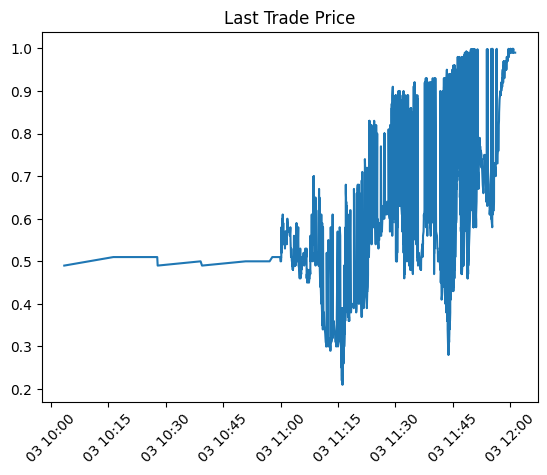

In [62]:
plt.title('Last Trade Price')
plt.plot(dataset['last_trade_price']['price'].astype(float))
plt.xticks(rotation=45)
plt.show()

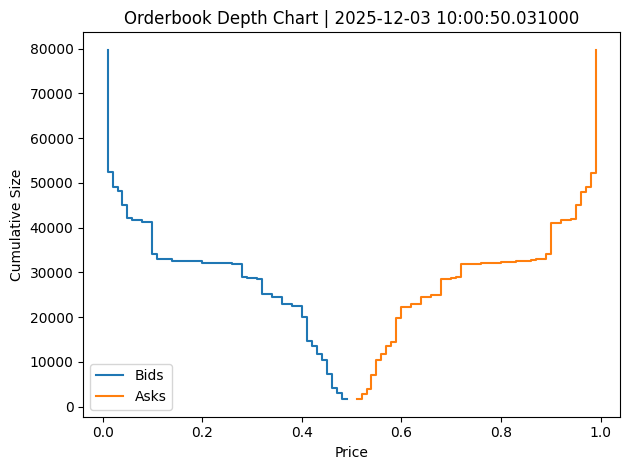

In [87]:
def plot_orderbook_depth(book_df, i: int = 0):
    asks = json.loads(book_df['asks'].iloc[i])
    bids = json.loads(book_df['bids'].iloc[i])

    ask_prices = [float(d["price"]) for d in asks]
    ask_sizes  = [float(d["size"]) for d in asks]

    bid_prices = [float(d["price"]) for d in bids]
    bid_sizes  = [float(d["size"]) for d in bids]

    ask_pairs = sorted(zip(ask_prices, ask_sizes), key=lambda x: x[0])
    bid_pairs = sorted(zip(bid_prices, bid_sizes), key=lambda x: x[0], reverse=True)

    ask_prices_sorted = [p for p, s in ask_pairs]
    ask_sizes_sorted  = [s for p, s in ask_pairs]

    bid_prices_sorted = [p for p, s in bid_pairs]
    bid_sizes_sorted  = [s for p, s in bid_pairs]

    ask_cum = []
    running = 0
    for s in ask_sizes_sorted:
        running += s
        ask_cum.append(running)

    bid_cum = []
    running = 0
    for s in bid_sizes_sorted:
        running += s
        bid_cum.append(running)

    plt.step(bid_prices_sorted, bid_cum, where='post', label='Bids')
    plt.step(ask_prices_sorted, ask_cum, where='post', label='Asks')

    plt.xlabel("Price")
    plt.ylabel("Cumulative Size")
    plt.title(f"Orderbook Depth Chart | {book_df.index[i]}")
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_orderbook_depth(dataset['book'], 0)

In [101]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

def draw_orderbook_depth(book_df, i, ax):
    asks = json.loads(book_df['asks'].iloc[i])
    bids = json.loads(book_df['bids'].iloc[i])

    ask_prices = [float(d["price"]) for d in asks]
    ask_sizes  = [float(d["size"]) for d in asks]
    bid_prices = [float(d["price"]) for d in bids]
    bid_sizes  = [float(d["size"]) for d in bids]

    ask_pairs = sorted(zip(ask_prices, ask_sizes), key=lambda x: x[0])
    bid_pairs = sorted(zip(bid_prices, bid_sizes), key=lambda x: x[0], reverse=True)

    ask_prices_sorted = [p for p, s in ask_pairs]
    ask_sizes_sorted  = [s for p, s in ask_pairs]
    bid_prices_sorted = [p for p, s in bid_pairs]
    bid_sizes_sorted  = [s for p, s in bid_pairs]

    ask_cum = []
    running = 0
    for s in ask_sizes_sorted:
        running += s
        ask_cum.append(running)

    bid_cum = []
    running = 0
    for s in bid_sizes_sorted:
        running += s
        bid_cum.append(running)

    ax.cla()
    ax.step(bid_prices_sorted, bid_cum, where='post', label='Bids')
    ax.step(ask_prices_sorted, ask_cum, where='post', label='Asks')
    ax.set_xlabel("Price")
    ax.set_ylabel("Cumulative Size")
    ax.set_title(f"Orderbook Depth Chart | {book_df.index[i]}")
    ax.legend(loc='upper center')

book_df = dataset['book']
fig, ax = plt.subplots()

step = 20
frames = range(0, len(book_df), step)

def update(frame_idx):
    draw_orderbook_depth(book_df, frame_idx, ax)

ani = FuncAnimation(fig, update, frames=frames, interval=100, repeat=True)

html = ani.to_jshtml()
plt.close(fig)
HTML(html)